# Tratamiento de dataframe de empresas

## Business Questions

1. ¿How is the quantity of employees distributed across the differen ecuadorian regions? ¿How to/should we factor in company size? 

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/rankingCVSV.csv',sep=';', encoding='latin')
df.head()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,1.0,1,384.0,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,"10,768.00","2,121,860,458.59","1,482,973,135.","2,170,602,774.","187,168,402.3","220,198,120.31","147,499,234.25","41,971,212.00","2,170,602,774.93"
1,2.0,4,6796.0,ECUACORRIENTE S.A.,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,SOCIETARIO,966.00,"1,607,423,376.00","568,986,647.0",0.00,"-1,387,158.70",0.00,"-2,633,855.70","1,246,697.02",0.00
2,3.0,3,93144.0,AURELIAN ECUADOR S.A,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,GRANDE,SOCIETARIO,"1,451.00","1,599,727,165.00","605,293,529.0","358,792,587.0","-49,399,080.0","-49,399,080.00","-49,399,080.00",0.00,"358,823,965.00"
3,4.0,2,705547.0,SHAYA ECUADOR S.A.,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,92.00,"1,354,952,445.00","786,817,297.0","669,076,072.0","179,317,070.0","210,961,259.00","133,709,258.00","45,607,812.10","669,076,072.00"
4,5.0,5,47845.0,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES S....,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,SOCIETARIO,"2,844.00","1,217,718,379.00","264,709,114.0","1,066,241,897.","174,644,376.0","204,823,940.00","106,826,750.00","67,817,626.00","1,071,561,214.00"


## Cleaning

### Eliminating NaN

In [3]:
# For now, we'll use the strategy of ignoring companies whose values are not available
df.dropna(inplace=True)
df.head(10)

,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,1.0,1,384.0,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,"10,768.00","2,121,860,458.59","1,482,973,135.","2,170,602,774.","187,168,402.3","220,198,120.31","147,499,234.25","41,971,212.00","2,170,602,774.93"
1,2.0,4,6796.0,ECUACORRIENTE S.A.,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,SOCIETARIO,966.00,"1,607,423,376.00","568,986,647.0",0.00,"-1,387,158.70",0.00,"-2,633,855.70","1,246,697.02",0.00
2,3.0,3,93144.0,AURELIAN ECUADOR S.A,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,GRANDE,SOCIETARIO,"1,451.00","1,599,727,165.00","605,293,529.0","358,792,587.0","-49,399,080.0","-49,399,080.00","-49,399,080.00",0.00,"358,823,965.00"
3,4.0,2,705547.0,SHAYA ECUADOR S.A.,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,92.00,"1,354,952,445.00","786,817,297.0","669,076,072.0","179,317,070.0","210,961,259.00","133,709,258.00","45,607,812.10","669,076,072.00"
4,5.0,5,47845.0,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES S....,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,SOCIETARIO,"2,844.00","1,217,718,379.00","264,709,114.0","1,066,241,897.","174,644,376.0","204,823,940.00","106,826,750.00","67,817,626.00","1,071,561,214.00"
5,6.0,7,143615.0,CONSORCIO SHUSHUFINDI S.A.,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,39.00,"914,184,335.00","838,006,103.0","291,248,873.0","92,380,051.70","108,682,413.00","70,961,856.10","21,418,195.60","291,252,869.00"
7,7.0,8,93325.0,CORPORACION QUIPORT S.A.,ANÓNIMA,M7020.04 - PRESTACIÓN DE ASESORAMIENTO Y AYUDA...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,70.00,"814,067,849.00","212,852,599.0","17,650,644.20","-27,053,323.0","-27,053,323.10","-27,053,323.00",0.00,"83,530,647.90"
8,8.0,9,2913.0,CORPORACION EL ROSADO S.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,MERCADO DE VALORES,3.00,"754,024,531.84","283,755,098.2","1,249,085,559.","39,246,084.65","46,171,864.30","27,622,934.68","11,328,623.69","1,265,116,683.48"
9,9.0,11,10532.0,HIDALGO E HIDALGO S.A.,ANÓNIMA,"F4210.11 - CONSTRUCCIÓN DE CARRETERAS, CALLES,...",SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,"1,144.00","749,530,535.00","652,393,996.0","115,979,619.0","33,867,923.10","39,844,616.00","26,384,065.20","7,483,857.89","158,895,431.00"
10,10.0,6,47972.0,OTECEL S.A.,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,905.00,"745,272,999.60","230,674,502.0","444,508,999.7","-21,301,000.0","-21,301,626.91","-17,245,260.43",0.00,"468,804,782.94"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75165 entries, 0 to 79043
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   2020                        75165 non-null  float64
 1   2019                        75165 non-null  object 
 2   EXPEDIENTE                  75165 non-null  float64
 3   NOMBRE                      75165 non-null  object 
 4   TIPO COMPAÑIA               75165 non-null  object 
 5   ACTIVIDAD ECONÓMICA         75165 non-null  object 
 6   REGION                      75165 non-null  object 
 7   PROVINCIA                   75165 non-null  object 
 8   CIUDAD                      75165 non-null  object 
 9   TAMAÑO                      75165 non-null  object 
 10  SECTOR                      75165 non-null  object 
 11  CANT. EMPLEADOS             75165 non-null  object 
 12  ACTIVO2020                  75165 non-null  object 
 13  PATRIMONIO2020              751

Now we need to clean certain nonsensical unique values in the columns "TAMAÑO" and "SECTOR". We found those by cheching each column with df["column_name"].unique()

### "SECTOR" Column

In [5]:
# SECTOR unique values
df["SECTOR"].unique()

array(['MERCADO DE VALORES', 'SOCIETARIO', 'MERCADO DE '], dtype=object)

In [6]:
# We check which companies have the non-sensical value in "SECTOR"
df.loc[df.SECTOR == "MERCADO DE ", "NOMBRE"]

943     DILIPA, DISTRIBUIDORA DE LIBROS Y PAPELERIA C....
3374                          CASA DE VALORES ADVFIN S.A.
Name: NOMBRE, dtype: object

In [7]:
def clean_sector(row):
  if(row == "MERCADO DE "):
    return "MERCADO DE VALORES"
  return row

df["SECTOR"] = df["SECTOR"].apply(clean_sector)

In [8]:
df.SECTOR.unique()

array(['MERCADO DE VALORES', 'SOCIETARIO'], dtype=object)

### "TAMAÑO" Column

In [9]:
# "TAMAÑO" unique values
df["TAMAÑO"].unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA', 'MICROEMPRES'],
      dtype=object)

In [10]:
# We check which companies have the non-sensical value in "TAMAÑO" (271 companies)
df.loc[df.TAMAÑO == "MICROEMPRES", "NOMBRE"].shape

(273,)

In [11]:
def clean_tamano(row):
  if(row == "MICROEMPRES"):
    return "MICROEMPRESA"
  return row

df["TAMAÑO"] = df["TAMAÑO"].apply(clean_tamano)

In [12]:
# We make sure it's clean now (0 companies)
df.loc[df.TAMAÑO == "MICROEMPRES", "NOMBRE"].shape

(0,)

In [13]:
df.TAMAÑO.unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA'], dtype=object)

### Misc

"CORPORACIÓN EL ROSADO" is one of the biggest companies in Ecuador, so we know it's impossible that it only has 3 employees, regardless of what the SuperCIAS say in their 
report. 

After some investigation, there is a another report by the SuperCias that show the real number of employees from "EL ROSADO".

In [14]:
# We change the original value of employees to the actual value
df.loc[8, "CANT. EMPLEADOS"]

'3.00'

In [15]:
df.loc[8, "CANT. EMPLEADOS"] = 7334

In [16]:
df.loc[8, "CANT. EMPLEADOS"]

7334

## Data Type Conversion

In [17]:
# df[['REGION', 'NOMBRE']].groupby('REGION').count()

In [18]:
# Convert columns to a more appropiate data type 
df = df.convert_dtypes()
df.dtypes

2020                           Int64
2019                          string
EXPEDIENTE                     Int64
NOMBRE                        string
TIPO COMPAÑIA                 string
ACTIVIDAD ECONÓMICA           string
REGION                        string
PROVINCIA                     string
CIUDAD                        string
TAMAÑO                        string
SECTOR                        string
CANT. EMPLEADOS               object
ACTIVO2020                    object
PATRIMONIO2020                string
INGRESOS POR VENTA2020        string
UTILIDAD ANTES DE 2020        string
UTILIDAD DEL EJERCICIO2020    string
UTILIDAD NETA2020             string
IR CAUSADO2020                string
INGRESO TOTAL2020             string
dtype: object

In [19]:
# Create numerical column of employees per company
df['CANT. EMPLEADOS'] = df['CANT. EMPLEADOS'].str.replace(',','')
df['CANT. EMPLEADOS'] = pd.to_numeric(df['CANT. EMPLEADOS'])

## First Business Question
1. ¿How is the quantity of employees distributed across the different ecuadorian regions? ¿How to/should we factor in company size? 

### Exploration

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

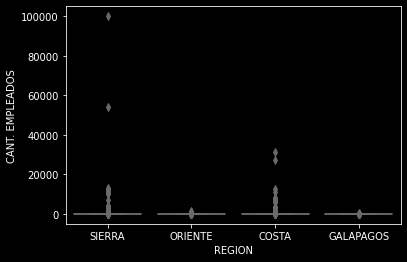

In [20]:
# The first things is to see the data as it is. Let's take a look at the distribution of employees when pitted agains ecuadorian regions.
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df)

#### Plot Analysis:
This result might seem discouraging, however it might conceal some important insights. One can see that there are a couple of points that go well beyond the box in all 4 ecuadorian regions; most notably "SIERRA" and "COSTA". 

Normally, an analysis and treatment to eliminate outliers might be in order, however, outliers in this regard are imporant, they represent (usually) the most important (and big in terms of hiring) companies of the country. So cutting them out is out of the question.

This unreadable chart might have to do something with most of businesses having very few employees. Let's take a closer look.

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

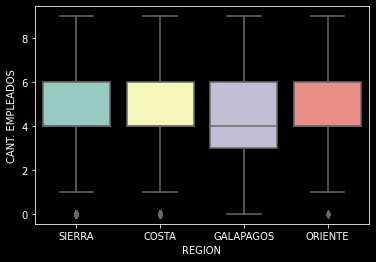

In [21]:
# Let's create a copy of the original data frame in order to visualize only companies with less than 10 employees
df2 = df.loc[df["CANT. EMPLEADOS"] < 10]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df2)

In [22]:
# Let's compare the number companies above 10,000 employees vs the number of companies with less than 10.
num_big_comp = str(df.loc[ df["CANT. EMPLEADOS"] >= 10000, "NOMBRE"].shape[0])
num_small_comp = str(df.loc[ df["CANT. EMPLEADOS"] < 10, "NOMBRE"].shape[0])
print("Number of companies with 10,000 or more employees: " + num_big_comp + "\nNumber of companies with less than 10 employees: " + num_small_comp)

Number of companies with 10,000 or more employees: 13
Number of companies with less than 10 employees: 62178


#### Plot Analysis and data analysis
This validates our previous suspicions. The first plot was graphically squashed due to the giant disparity between the amount of employees that companies hold. Almost all companies (82.72%) have less than 10 workers however the "outliers" having more than 10,000 employees represent a fundamental part of the ecuadorian workforce, therefore, should not be eliminated.

#### Course of action
Taking into account company size will help visualize the distribution of workers accross regions better, in other words, let's take into account the size size of the company as well.

In [23]:
# First let's take a look at the standard deviation depending on region
df[["REGION", "CANT. EMPLEADOS"]].groupby("REGION").agg('std')

,CANT. EMPLEADOS
REGION,
COSTA,255.032530
GALAPAGOS,20.317047
ORIENTE,47.301414
SIERRA,642.850603


In [24]:
# Now let's take a look at the standard deviation between regions taking into account size of the company
df[["TAMAÑO", "REGION", "CANT. EMPLEADOS"]].groupby(["REGION", "TAMAÑO"]).agg('std')

CANT. EMPLEADOS
REGION    TAMAÑO                       
COSTA     GRANDE             965.770662
          MEDIANA             44.251405
          MICROEMPRESA        80.846087
          PEQUEÑA            325.933751
GALAPAGOS GRANDE                    NaN
          MEDIANA             31.476068
          MICROEMPRESA         5.629651
          PEQUEÑA              9.498558
ORIENTE   GRANDE             407.419235
          MEDIANA             28.848805
          MICROEMPRESA         4.999994
          PEQUEÑA             10.690359
SIERRA    GRANDE            2937.556695
          MEDIANA            225.397981
          MICROEMPRESA       407.947178
          PEQUEÑA            111.646027

#### Data analysis:
This might seem impossible or counter-intuitive at first. How is it possible that by grouping together companies by size the deviation dramatically increases compared to when it is not grouped by size? In reality the data it's trying to tell us that there's even more disparity in the amount of employees that companies of the same size have than when we ignore sizes all together.

This might mean that there are serious outliers within the categories of "TAMAÑO", when it comes to employees. Maybe the SuperCias doesn't prioritize number of employees as a factor for categorizing companies in size. 

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

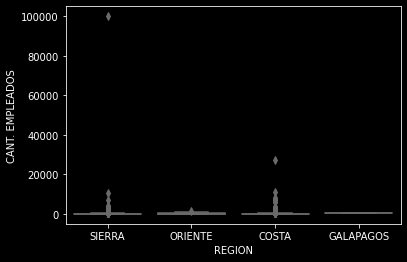

In [25]:
# Let's confirm our suspicions of intra-company-size outliers.
df3 = df.loc[df["TAMAÑO"] == "GRANDE"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df3)

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

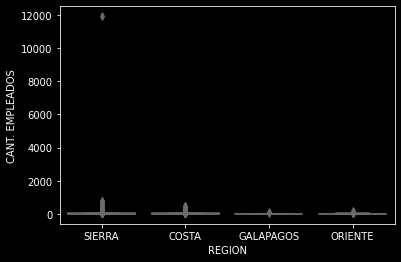

In [26]:
df4 = df.loc[df["TAMAÑO"] == "MEDIANA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df4)

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

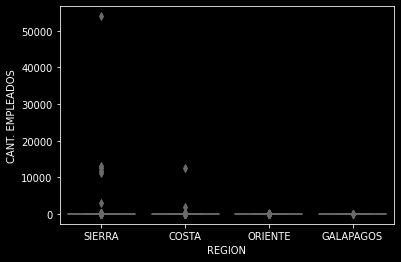

In [27]:
df5 = df.loc[df["TAMAÑO"] == "MICROEMPRESA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df5)

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

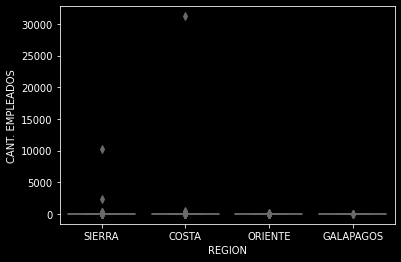

In [28]:
df6 = df.loc[df["TAMAÑO"] == "PEQUEÑA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df6)

#### Course of action 
Create our own size of company column based on number of employees alone.

In [29]:
df['TAMANO_EMPLEADOS'] = pd.qcut(df["CANT. EMPLEADOS"], 5 ,labels=['MICROEMPRESA','PEQUEÑA', 'MEDIANA', 'GRANDE'], duplicates='drop')

In [30]:
df.groupby(["TAMANO_EMPLEADOS", "REGION"])["CANT. EMPLEADOS"].count()


TAMANO_EMPLEADOS  REGION   
MICROEMPRESA      COSTA        20695
                  GALAPAGOS      226
                  ORIENTE       1346
                  SIERRA       17467
PEQUEÑA           COSTA         7086
                  GALAPAGOS       74
                  ORIENTE        490
                  SIERRA        6351
MEDIANA           COSTA         3325
                  GALAPAGOS       41
                  ORIENTE        245
                  SIERRA        3170
GRANDE            COSTA         7086
                  GALAPAGOS       48
                  ORIENTE        250
                  SIERRA        7264
Name: CANT. EMPLEADOS, dtype: int64

In [31]:
df.groupby("TAMANO_EMPLEADOS")["CANT. EMPLEADOS"].agg('std')


TAMANO_EMPLEADOS
MICROEMPRESA       0.810450
PEQUEÑA            0.476345
MEDIANA            0.499967
GRANDE          1063.884133
Name: CANT. EMPLEADOS, dtype: float64

#### Analysis
With this we can observe that there is a huge disparity in employee number in the top quartile of companies while and values seem quite uniform in the remaining 3 quartiles. Most disparity in employee quantity happens in the top companies.

#### Course of action
We'll take a look at the distribution of quantity of employees for the first 3 quartiles first and then well take a look at the last quartile separately.

### First Quartile

In [32]:
df_q1 = df.loc[df["TAMANO_EMPLEADOS"] == "MICROEMPRESA"]
df_q1.shape

(39734, 21)

0.8104501380515791

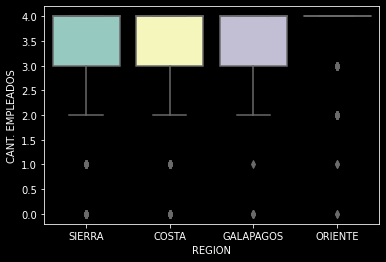

In [33]:
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df_q1)
df_q1["CANT. EMPLEADOS"].std()

In [34]:
df_q1[["CANT. EMPLEADOS", "REGION"]].groupby("REGION").mean()

,CANT. EMPLEADOS
REGION,
COSTA,3.531433
GALAPAGOS,3.411504
ORIENTE,3.725854
SIERRA,3.478159


In [35]:
# Cuantificaci´n de resultados
comp_dos_emp= df_q1.loc[df_q1["CANT. EMPLEADOS"] == 2].shape[0]
comp_un_emp= df_q1.loc[df_q1["CANT. EMPLEADOS"] == 1].shape[0]
porc_dos = comp_dos_emp / df_q1.shape[0]
porc_un = comp_un_emp / df_q1.shape[0]


comp_dos_emp
porc_dos

comp_un_emp
porc_un

0.012910857200382543

#### First Quartile Analysis
We can now see that, when it comes to "MICROEMPRESA", most companies in "SIERRA", "COSTA" and "GALAPAGOS" have around 3-4 employees. We can deduce that the aberrant values that present 0 empoyees should not be taken into account. 

The companies that have 2 employees are equal to 4249 (10.69% of this quartile), the companies that have 1 employee are only 513 (1.29%). 

We can also se that "ORIENTE" does not fall into the same trend as the other regions of Ecuador when it comes to the amount of employees the companies have (by our definition, very few "MICROEMPRESAS"), and thanks to the previous exploration we know that this doesn't necesarily mean that "ORIENTE" has few "MICROEMPRESAS"(1346, 3rd place). They just tend to have a different employee number.

This is particulary interesting considering they have relatively similar means (3<mean<4)

### Second Quartile

In [36]:
df_q2 = df.loc[df["TAMANO_EMPLEADOS"] == "PEQUEÑA"]
df_q2.shape

(14001, 21)

0.4763450951441411

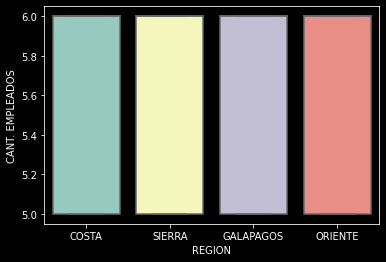

In [37]:
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df_q2)
df_q2["CANT. EMPLEADOS"].std()

In [38]:
# Let's see if there's a single company in the second quartile with more than 6 employees
df_q2.loc[df["CANT. EMPLEADOS"] > 6].shape

(0, 21)

In [39]:
df_q2.loc[df["CANT. EMPLEADOS"] < 5].shape

(0, 21)

In [40]:
df_q2[["CANT. EMPLEADOS", "REGION"]].groupby("REGION").mean()

,CANT. EMPLEADOS
REGION,
COSTA,5.678803
GALAPAGOS,5.689189
ORIENTE,5.679592
SIERRA,5.619587


In [41]:
# Let's see how many companies have 5 employees and how many have 6
df_q2.groupby("CANT. EMPLEADOS")["NOMBRE"].count()

CANT. EMPLEADOS
5.0    4872
6.0    9129
Name: NOMBRE, dtype: int64

<AxesSubplot:xlabel='CANT. EMPLEADOS', ylabel='Count'>

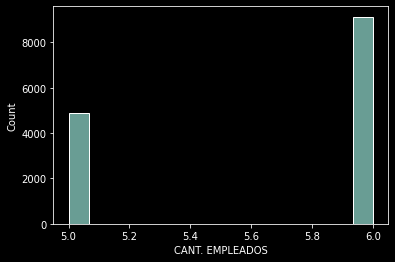

In [42]:
sns.histplot(df_q2["CANT. EMPLEADOS"])

#### Second Quartile Analysis

This results show that the entirity of the second quartile for ALL regions have either 5 or 6 employees in Ecuador, where 34.8% (4872) of companies in "PEQUENA" hold 5 employees and nearly 65.2% (9129) hold 6.

### Third Quartile

In [43]:
df_q3 = df.loc[df["TAMANO_EMPLEADOS"] == "MEDIANA"]
df_q3.shape

(6781, 21)

0.49996743789263987

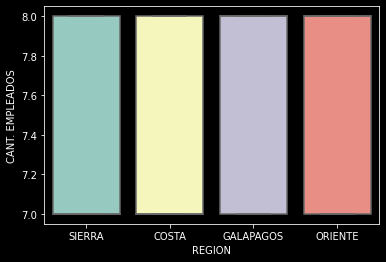

In [44]:
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df_q3)
df_q3["CANT. EMPLEADOS"].std()

#### Analysis
At this point we can confirm these trend. In this quartile all companies have either 7 or 8 employees. Making it so that even when we grouped registers by quantiles all significant variation comes from the top 25% of companies when it comes to employee number, regardless of region.

To confirm this, let's visulize the las quartile.

### Last Quartile

In [45]:
df_q4 = df.loc[df["TAMANO_EMPLEADOS"] == "GRANDE"]
df_q4.shape

(14648, 21)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CANT. EMPLEADOS'>

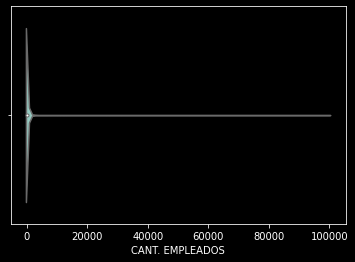

In [46]:
sns.violinplot(df_q4["CANT. EMPLEADOS"])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CANT. EMPLEADOS'>

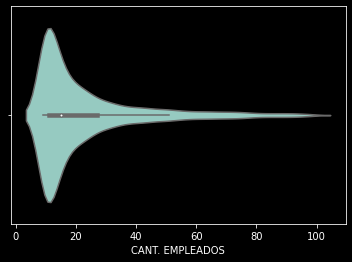

In [47]:
sns.violinplot(df_q4["CANT. EMPLEADOS"].loc[df["CANT. EMPLEADOS"]< 100])

#### Analysis
With these two violin plots we can visualize that most registers in the "GRANDE" category are under 100. Most of the data well find in double digits even if the significant "players" represent an important factor in the worforce. 


### General

<AxesSubplot:xlabel='REGION', ylabel='CANT. EMPLEADOS'>

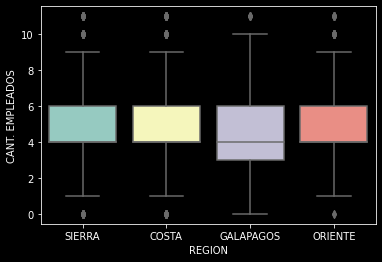

In [48]:
# A more reasonable boxplot for distributions is:
alt = df.loc[df["CANT. EMPLEADOS"] < 12 ]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data= alt)

#### Analysis
Since more than 80% of all our companies are below 10 employees, when we examine their distribution, we can start to appreciate that region wise the trends are similar, with the exception of "GALAPAGOS". In fact, visually "SIERRA", "COSTA" and "ORIENTE" look identical at first glance.

All regions lest "GALAPAGOS" tend to predominantly have from 4 to 6 employees making such range the entire last quartile. "GALAPAGOS" however, seems to have a more even (simetric) distribution than the other regions. It's not really simetric by anymeans, it clearly presents tilting towards the third quartile (4-6 employees, like the rest of the country) however we can atleast visualy apprecieate the second quartile.

We can also apreciate that passed 9 employees values tend to appear more as outliers instead of actual the actual body of the box. However "GALAPAGOS" extend the whisquers of the box up to 10 employees whereas every other region only up to 9. 

This could mea a number of things, maybe, because Galapagos is heavily regulated due to it being a turistic uggernaugh what would be onsidered informal businesses anywhere else in the country it's registered formally and officially in galapagos.

In [49]:
# Analyzing the hiring disparity (this time taking in to account the original SUPERCIAS ordering for best companies, that's why I can do it with only head(1000))
top_1000 = df.head(1000)
rest = df[1000:]
total_emp = df["CANT. EMPLEADOS"].sum()
top_emp = top_1000["CANT. EMPLEADOS"].sum()
rest_emp = rest["CANT. EMPLEADOS"].sum()

top_perc = top_emp/total_emp
rest_perc = rest_emp/total_emp

print(top_perc, rest_perc)


0.23902341360169602 0.760976586398304


<ipython-input-50-07630f27741d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['TOP'] = "TOP"
<ipython-input-50-07630f27741d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest['TOP'] = "NOT TOP"


<AxesSubplot:ylabel='CANT. EMPLEADOS'>

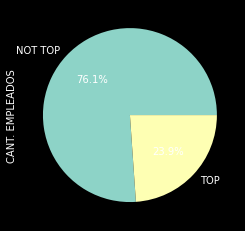

In [50]:
# Let's visualize
top_1000['TOP'] = "TOP"
rest['TOP'] = "NOT TOP"

frames = [top_1000, rest]
new_df = pd.concat(frames, sort=False)

#groupby the data by delivery type
my_pie = new_df.groupby("TOP")["CANT. EMPLEADOS"].sum()
my_pie.plot.pie(autopct="%.1f%%")



#### Analysis
This is the main reason why normalizing the companies might be too radical in this case. There is a disproportionate amount of hiring being done by the top 1000 companies (23.09%) in comparison to ALL other companies of the country.

## Preliminary Conclusions On Business Question #1

We can conclude that there's a very prevalent mistmatch in terms of "CANT. EMPLEADOS" regardless of region.

The difference in order of magnitude of the data is such that even when grouping by quartiles, the distribution is heavyly squewed. This would make a good argument for eliminating outliers, however, when we try to understand the overall role of companies in the workforce of a country those big-sized outliers are a key factor and not taking them into account might be a mistake.

If we were to ignore the main companies of the country, we should normalize the values in order to have a more uniform body of data.

One thing is clear almost all companies in the country are under 10 workers (82.72%) this is indifferent of region. A more fruitful inter-regional analysis might be to see the distribution of company sizes across regions (using the original size categories). We can even see how when viewing a box plox of all companies under 12 empoyees we get a much more measured graph.

Also another good analysis that might come from this question is to look for the impact of the big outliers when compared to the sheer mass of smaller companies (less than 10 workers). This could uncover how truly impactful this companies are in the Ecuadorian workforce and therefore suggest certain implications of employees that got to be hired by one of these ccompanies.